In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../Rotman MMA Summer Datathon NWHL.csv")

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26882 entries, 0 to 26881
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   game_date          26882 non-null  object 
 1   Home Team          26882 non-null  object 
 2   Away Team          26882 non-null  object 
 3   Period             26882 non-null  int64  
 4   Clock              26882 non-null  object 
 5   Home Team Skaters  26882 non-null  int64  
 6   Away Team Skaters  26882 non-null  int64  
 7   Home Team Goals    26882 non-null  int64  
 8   Away Team Goals    26882 non-null  int64  
 9   Team               26882 non-null  object 
 10  Player             26882 non-null  object 
 11  Event              26882 non-null  object 
 12  X Coordinate       26882 non-null  int64  
 13  Y Coordinate       26882 non-null  int64  
 14  Detail 1           17461 non-null  object 
 15  Detail 2           1985 non-null   object 
 16  Detail 3           198

In [4]:
print(df.head())

    game_date            Home Team     Away Team  Period  Clock  \
0  2021-01-23  Minnesota Whitecaps  Boston Pride       1  20:00   
1  2021-01-23  Minnesota Whitecaps  Boston Pride       1  19:58   
2  2021-01-23  Minnesota Whitecaps  Boston Pride       1  19:57   
3  2021-01-23  Minnesota Whitecaps  Boston Pride       1  19:55   
4  2021-01-23  Minnesota Whitecaps  Boston Pride       1  19:53   

   Home Team Skaters  Away Team Skaters  Home Team Goals  Away Team Goals  \
0                  5                  5                0                0   
1                  5                  5                0                0   
2                  5                  5                0                0   
3                  5                  5                0                0   
4                  5                  5                0                0   

           Team  ...          Event X Coordinate  Y Coordinate  Detail 1  \
0  Boston Pride  ...    Faceoff Win          100          

In [5]:
df['Detail 1'].unique()

array(['Backhand', nan, 'Carried', 'Snapshot', 'Indirect', 'Direct',
       'Lost', 'Played', 'Dumped', 'Wrap Around', 'Forehand', 'Retained',
       'Wristshot', 'Slapshot', 'Tripping', 'Roughing', 'Fan', 'Hooking',
       'Interference', 'Deflection', 'Too many men on the ice',
       'Charging', 'Holding', 'Illegal Check to the Head',
       'Game Misconduct', 'Cross-checking', 'Slashing', 'High-sticking',
       'Feet', 'Elbowing', 'Unsportsmanlike conduct',
       'Face-off violation', 'Holding the stick',
       'Goalkeeper interference'], dtype=object)

In [6]:
# sample_df = df.iloc[0:100, :]
# sample_df.to_csv('sample hocky data.csv', index=False)

In [74]:
event_type_df = df.copy()
event_type_df['count'] = 1

event_type_df = df.groupby(['Event', 'Detail 1']).size().copy()
print(event_type_df)


Event            Detail 1                 
Dump In/Out      Lost                         1637
                 Retained                      226
Faceoff Win      Backhand                      618
                 Feet                            1
                 Forehand                      227
Goal             Deflection                      6
                 Fan                             1
                 Slapshot                        3
                 Snapshot                       44
                 Wrap Around                     2
                 Wristshot                      20
Incomplete Play  Direct                       2011
                 Indirect                     1419
Penalty Taken    Charging                        1
                 Cross-checking                  7
                 Elbowing                        1
                 Face-off violation              1
                 Game Misconduct                 2
                 Goalkeeper interferenc

In [63]:
goals_df = df.loc[(df['Event'] == 'Goal')].copy()


goals_df_clean = goals_df[['Player', 'X Coordinate', 'Y Coordinate', 'Detail 1', 'Detail 2', 'Detail 3', 'Detail 4', 'Home Team Goals', 'Away Team Goals']]
print(goals_df_clean.head())
print(goals_df_clean.info())

                 Player  X Coordinate  Y Coordinate   Detail 1 Detail 2  \
387   Christina Putigna           175            44   Snapshot   On Net   
423        Jonna Curtis           180            39   Snapshot   On Net   
879   Winny Brodt-Brown           188            55   Snapshot   On Net   
2382      Kayla Friesen           144            15   Snapshot   On Net   
3052    Kristin Lewicki           168            28  Wristshot   On Net   

     Detail 3 Detail 4  Home Team Goals  Away Team Goals  
387         f        f                0                0  
423         f        f                0                1  
879         t        f                1                1  
2382        t        f                0                0  
3052        t        f                0                1  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 387 to 26693
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  -----

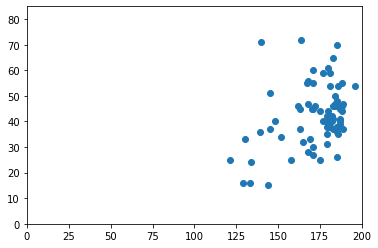

In [9]:
x = goals_df_clean['X Coordinate']
y = goals_df_clean['Y Coordinate']

plt.scatter(x, y)
plt.xlim(0, 200)
plt.ylim(0, 85)

plt.show()

In [10]:
import seaborn as sns

c:\Users\lokalv1\Anaconda3\envs\python_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


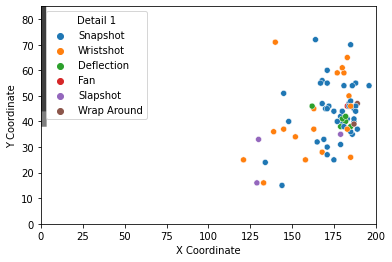

In [11]:
fig, ax = plt.subplots()
goal_plot = sns.scatterplot('X Coordinate', 'Y Coordinate', data=goals_df_clean, hue='Detail 1')

ax.set_xlim(0, 200)
ax.set_ylim(0, 85)

# plt.scatter(189, 42.5, marker='s', s=100)
goal_location = [189,189], [39.5, 45.5]

plt.plot(goal_location, linewidth=8, alpha = 0.5, color='k')

# plt.scatter(11, 42.5, marker='s', s=100)
plt.show()

<AxesSubplot:>

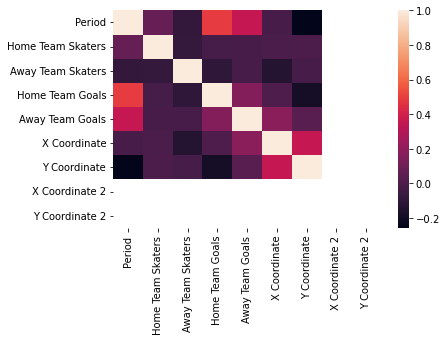

In [12]:
# corr = goals_df.corr()

# fig, ax = plt.subplots()
# sns.heatmap(corr)

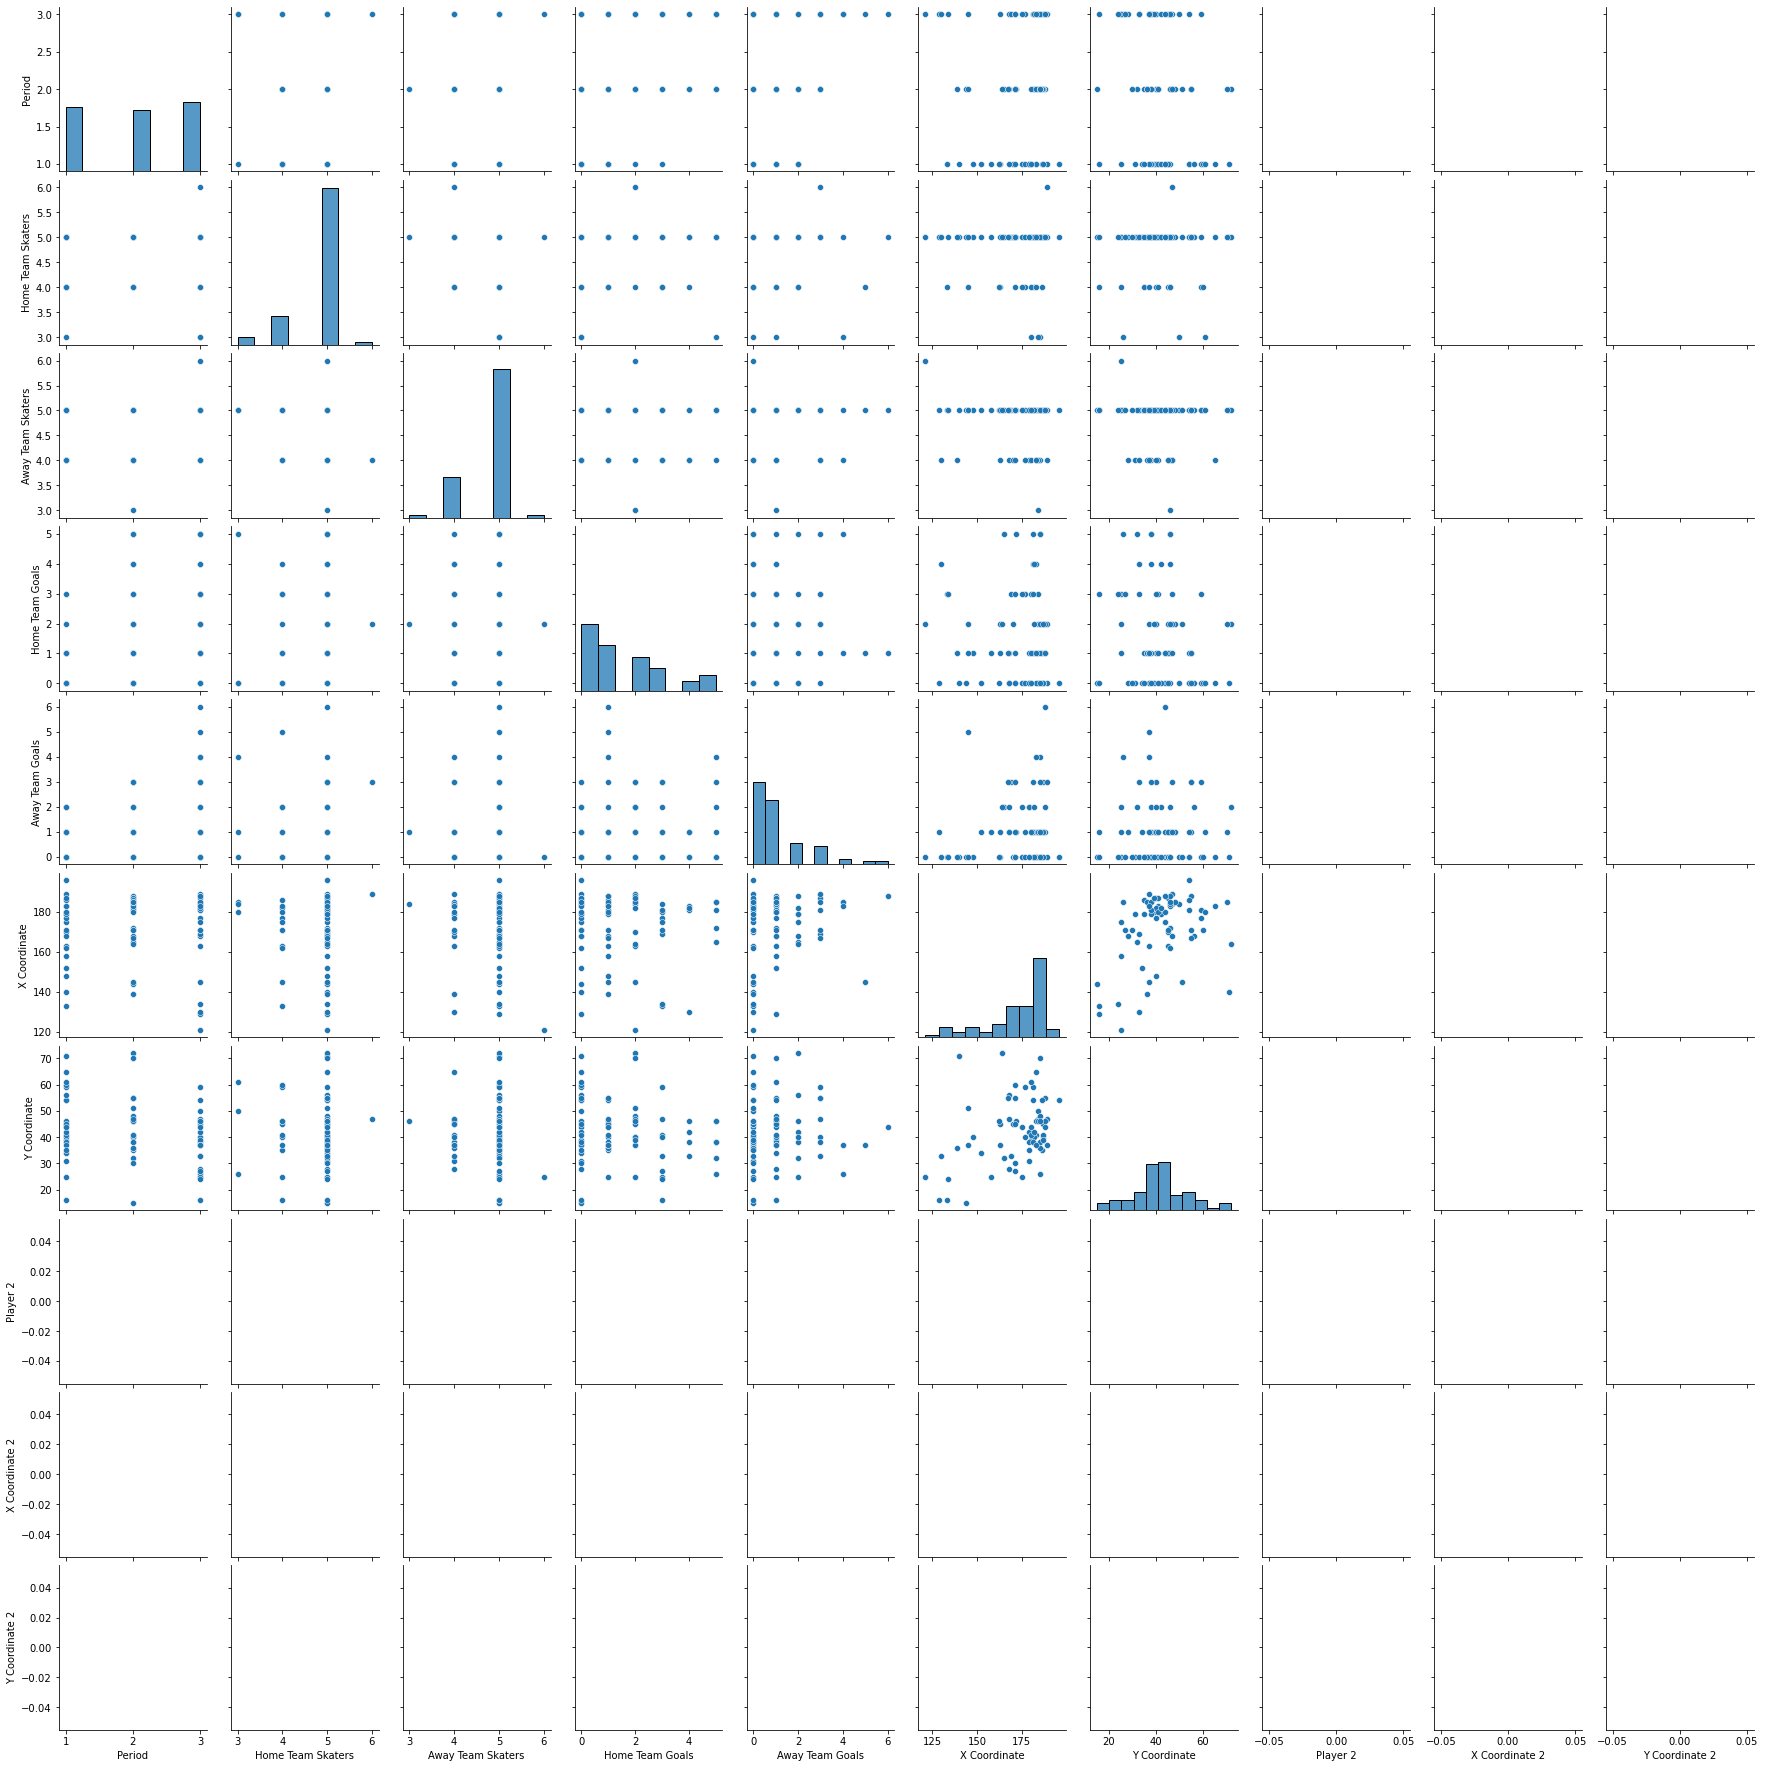

In [13]:
# sns.pairplot(goals_df)

In [62]:
goals_df_clean.to_csv('goals_df_clean.csv', index=True)

In [64]:
games_df = df.groupby(['game_date', 'Home Team', 'Away Team']).size().copy()
print(games_df)
print('number of games: ' + str(len(games_df.index)))
# games_df.to_csv('TEST games_df.csv', index=False)




game_date   Home Team              Away Team            
2021-01-23  Buffalo Beauts         Connecticut Whale        1997
            Metropolitan Riveters  Toronto Six              1719
            Minnesota Whitecaps    Boston Pride             1649
2021-01-24  Boston Pride           Buffalo Beauts           1798
            Connecticut Whale      Metropolitan Riveters    1870
            Toronto Six            Minnesota Whitecaps      1881
2021-01-26  Metropolitan Riveters  Minnesota Whitecaps      1817
            Toronto Six            Boston Pride             1730
2021-01-27  Buffalo Beauts         Toronto Six              1771
            Connecticut Whale      Boston Pride             1827
2021-01-30  Buffalo Beauts         Boston Pride             1793
            Toronto Six            Minnesota Whitecaps      1747
2021-01-31  Boston Pride           Buffalo Beauts           1766
            Toronto Six            Connecticut Whale        1772
2021-02-01  Buffalo Beauts       

In [45]:
# df['game_desc'] = df['Home Team'] + " vs " + df['Away Team']
# df.drop('game_desc', 1)
# df.head()

C:\Users\lokalv1\AppData\Local\Temp\ipykernel_21312\614654674.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('game_desc', 1)


,game_date,Home Team,Away Team,Period,Clock,Home Team Skaters,Away Team Skaters,Home Team Goals,Away Team Goals,Team,...,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2,X Coordinate 2,Y Coordinate 2,game_id,game_desc
0,2021-01-23,Minnesota Whitecaps,Boston Pride,1,20:00,5,5,0,0,Boston Pride,...,43,Backhand,NaN,NaN,NaN,Stephanie Anderson,NaN,NaN,2,Minnesota Whitecaps vs Boston Pride
1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:58,5,5,0,0,Boston Pride,...,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Minnesota Whitecaps vs Boston Pride
2,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:57,5,5,0,0,Boston Pride,...,28,Carried,NaN,NaN,NaN,Maddie Rowe,NaN,NaN,2,Minnesota Whitecaps vs Boston Pride
3,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:55,5,5,0,0,Boston Pride,...,28,Snapshot,On Net,t,f,NaN,NaN,NaN,2,Minnesota Whitecaps vs Boston Pride
4,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:53,5,5,0,0,Boston Pride,...,21,Backhand,NaN,NaN,NaN,Stephanie Anderson,NaN,NaN,2,Minnesota Whitecaps vs Boston Pride


In [67]:
new_df = df.copy()

new_df['game_id'] = df.groupby(['game_date', 'Home Team', 'Away Team'], sort=False).ngroup()+1

first_column = new_df.pop('game_id')
new_df.insert(0, 'game_id', first_column)

df.to_csv('TEST game id.csv', index=False)

In [97]:
columns = list(new_df.columns.values)
event_before_goal_df = pd.DataFrame(columns=columns)

# entry = pd.DataFrame()

entry = new_df.loc[7]
event_before_goal_df.loc[len(event_before_goal_df)] = entry
print(event_before_goal_df)

  game_id   game_date            Home Team     Away Team Period  Clock  \
0       1  2021-01-23  Minnesota Whitecaps  Boston Pride      1  19:48   

  Home Team Skaters Away Team Skaters Home Team Goals Away Team Goals  ...  \
0                 5                 5               0               0  ...   

        Event X Coordinate Y Coordinate Detail 1 Detail 2 Detail 3 Detail 4  \
0  Zone Entry          125            6  Carried      NaN      NaN      NaN   

          Player 2 X Coordinate 2 Y Coordinate 2  
0  Kaleigh Fratkin            NaN            NaN  

[1 rows x 22 columns]


In [98]:
x = 0
i = 1
columns = list(new_df.columns.values)
event_before_goal_df = pd.DataFrame(columns=columns)





while i < len(new_df):
    if (new_df['Event'][i] == 'Goal'):
        entry = new_df.loc[i-1]
        event_before_goal_df.loc[len(event_before_goal_df)] = entry
        
    i += 1

        
print(event_before_goal_df)        


   game_id   game_date            Home Team          Away Team Period  Clock  \
0        1  2021-01-23  Minnesota Whitecaps       Boston Pride      1   6:42   
1        1  2021-01-23  Minnesota Whitecaps       Boston Pride      1   5:40   
2        1  2021-01-23  Minnesota Whitecaps       Boston Pride      2   8:02   
3        2  2021-01-23       Buffalo Beauts  Connecticut Whale      2  15:55   
4        2  2021-01-23       Buffalo Beauts  Connecticut Whale      3  14:33   
..     ...         ...                  ...                ...    ...    ...   
71      15  2021-02-01       Buffalo Beauts       Boston Pride      2  10:27   
72      15  2021-02-01       Buffalo Beauts       Boston Pride      2   3:04   
73      15  2021-02-01       Buffalo Beauts       Boston Pride      3  16:39   
74      15  2021-02-01       Buffalo Beauts       Boston Pride      3  10:14   
75      15  2021-02-01       Buffalo Beauts       Boston Pride      3   7:04   

   Home Team Skaters Away Team Skaters 

76
